<a href="https://colab.research.google.com/github/ucfilho/ANN_raianars/blob/master/ANN_parte_004_ANN_SET_20_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statistics as st

# este comando clona o diretorio github ucfilho/ANN no colaboratory research
!git clone https://github.com/RaianaSeixas/ANN #clonar do Github
%cd ANN
!ls
print("Hello world"+"\n"+"I'm evolving!!!"+"\n")

%matplotlib inline

fatal: destination path 'ANN' already exists and is not an empty directory.
/content/ANN
imput_ANN.zip		 X_DAT_set_17_2019.csv	  Y_DAT_set_17_2019.csv
X_DAT_B_set_17_2019.csv  Y_DAT_B_set_17_2019.csv
Hello world
I'm evolving!!!



In [0]:
# funcao normatiza dados
def Normatiza_old(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:

# funcao retorna os dados a forma original
def Original_old(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        sd_x=st.stdev(x[i])
        mean_x=st.mean(x[i])
        x[i]=(x[i]-mean_x)/sd_x
    return x

In [0]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        sd_x=st.stdev(x_old[i])
        mean_x=st.mean(x_old[i])
        x[i]=x[i]*sd_x+mean_x
    return x

In [0]:
# leitura dos dados
DAT=pd.read_csv("X_DAT_B_set_17_2019.csv")
DAT_Y=pd.read_csv("Y_DAT_B_set_17_2019.csv")

In [0]:
strings=list(DAT_Y)
print(strings)

['Unnamed: 0', 'NP', 'F', 'CR']


In [0]:
DAT_OLD=[]
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)

DAT_OLD_Y=[]
DAT_OLD_Y=DAT_Y.copy()
DAT_Y=Normatiza(DAT_Y)
#print(DAT_Y['CR'])

0     -0.349210
1     -0.508535
2      0.148592
3     -0.537278
4      0.488985
5     -0.801744
6     -0.333114
7      3.072158
8     -0.575416
9      0.149180
10    -0.877515
11    -0.290899
12     1.242916
13    -0.789390
14     0.613784
15    -0.498748
16    -0.616004
17     2.093398
18    -0.349210
19    -0.508535
20     0.148592
21    -0.537278
22     0.488985
23    -0.801744
24    -0.333114
25     3.072158
26    -0.575416
27     0.852377
28    -0.918086
29    -0.072706
         ...   
105   -0.724825
106   -0.430156
107    0.146358
108   -0.528910
109    1.343434
110   -0.428950
111   -0.444698
112   -0.898176
113    3.344671
114   -0.697734
115   -0.831149
116   -0.081985
117   -0.924251
118   -0.366493
119    0.123936
120    0.661408
121   -0.747111
122    0.205297
123   -0.930768
124   -0.192121
125   -0.085322
126   -0.562990
127   -0.080047
128   -0.024075
129   -0.578375
130    0.350528
131   -0.773445
132   -0.295377
133   -0.232071
134    0.317316
Name: CR, Length: 135, d

In [0]:
#for i in range(len(DAT_Y['CR'])):
#  print(DAT_Y['NP'][i])

In [0]:
#print(DAT_OLD_Y)
#for i in range(len(DAT_Y['CR'])):
#  print(DAT_Y['NP'][i])

In [0]:
# obtem as variaveis independentes (treino e teste)
# separa os dados em treino e teste
train=DAT.sample(frac=0.9,random_state=78) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
x_train=train.iloc[:,[1,2,3,4,5,6]]
x_test=test.iloc[:,[1,2,3,4,5,6]]
X_OLD=DAT_OLD.iloc[:,[1,2,3,4,5,6]]
#print(x_train)

In [0]:
# obtem as variaveis dependentes (treino e teste)
train=DAT_Y.sample(frac=0.9,random_state=878) # poderia ser frac=0.5? sim ou nao?
test=DAT_Y.drop(train.index)
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
#print(y_train)

In [0]:
Num=len(y_train)
print(Num)


122


In [0]:
#for i in range(len(y_train)):
#  print(y_train.iloc[i,0])

In [0]:
#print(y_train)

In [0]:
#print(y_train)

In [0]:
#print(DAT_Y)

In [0]:
# define a rede neural 
#clf = MLPRegressor(solver='lbfgs',activation='tanh',max_iter=500000,alpha=1e-5,
clf = MLPRegressor(solver='lbfgs',activation='logistic',max_iter=500000,alpha=1e-5,
                   hidden_layer_sizes=(8),#out_activation='purelin',
                   random_state=None)
# ??? self.out_activation_ = 'identity'
# treina a rede neural
clf.fit(x_train, y_train)

# usa a rede neural treina em calculos para treino e teste
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#print(clf)

In [0]:
#print(y_calc_test)


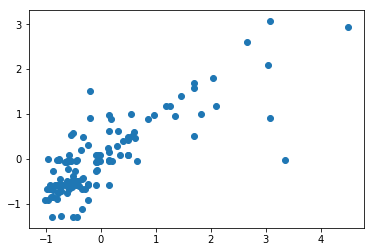

In [0]:
plt.scatter(y_train,y_calc_train)

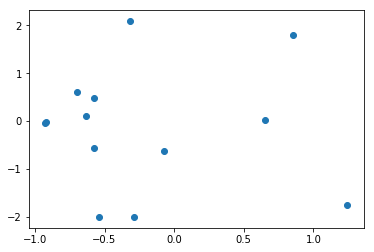

In [0]:
plt.scatter(y_test,y_calc_test)

In [0]:
#print(max(y_calc_test))
#print(y_calc_test.index(max(y_calc_test)))
#item=max(y_calc_test)
#item_index = np.where(y_calc_test==item)
#print(item_index)


In [0]:
#print(y_calc_test[17])
#print(x_test.iloc[17,:])
#print(y_test[17])

In [0]:
print(x_test)

     DI RELATIVO  FRAC Its  VELOC FOBJ   VELOC X  DELTA FOBJ  DELTA VX
3      -1.307837 -0.374641   -0.036178  1.001366    1.042963 -0.128829
12     -1.393240 -0.542292    1.184827 -1.196754   -0.130370 -1.709913
20     -0.178788 -0.783546    1.184827 -1.196754    1.042963 -1.709913
29     -1.393350 -0.920822    1.184827 -0.097694   -0.130370 -0.128829
40     -1.249369 -0.272415   -0.036178 -1.196754   -1.303704 -0.919371
43     -1.393413  1.147071    1.184827 -0.097694   -0.130370 -0.128829
54      0.518748 -1.355605   -1.257182 -1.196754   -0.130370 -0.128829
68      0.982248  0.095345   -1.257182  1.001366   -0.130370  1.452255
78      0.101170  0.636582   -1.257182 -1.196754   -1.303704 -0.128829
105     0.169578  0.989709   -0.036178  1.001366   -0.130370  1.452255
115     0.375438  1.621635   -0.036178 -1.196754   -0.130370 -1.709913
116     0.403169  1.813076   -0.036178 -1.196754   -0.130370 -0.128829
120     1.190764 -0.213664   -0.036178  1.001366   -0.130370  1.452255


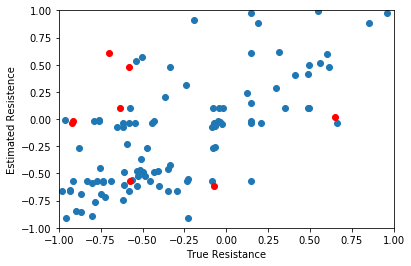

In [0]:
plt.scatter(y_train,y_calc_train)
plt.scatter(y_test,y_calc_test,color='r')
plt.xlabel("True Resistance")
plt.ylabel("Estimated Resistence")
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.show()

In [0]:
mse=mean_squared_error(y_train,y_calc_train)
print("MSE train=",mse)
R2=r2_score(y_train,y_calc_train)
print("R^2 train=",R2)

MSE train= 0.35506440598776057
R^2 train= 0.6602867463611584


In [0]:
mse=mean_squared_error(y_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 2.0324234970506634
R^2 teste= -3.539673717153965
